In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = True

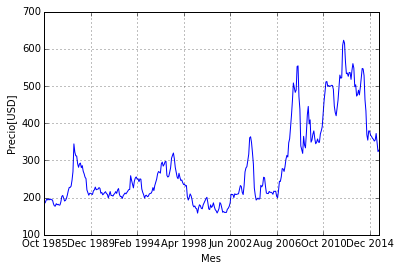

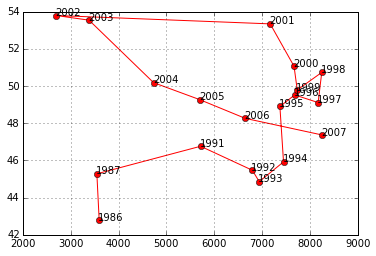

In [70]:
soy = pd.read_csv("soy.csv",delimiter="\t")
gini = pd.read_csv("gini.csv")
gdp = pd.read_csv("gdpcap.csv")
data = pd.concat([gdp,gini]).groupby("Country Name")

ax = soy.plot(x="Month",y="Price[USD]",legend=False)
ax.set_ylabel('Precio[USD]')
ax.set_xlabel("Mes")
data = pd.DataFrame(data.get_group("Argentina").iloc[:,5:-1].dropna(axis=1).T.reset_index().values, 
                    columns=["Date","GDP","GINI"], dtype=float)
data = data[data["Date"] < 2008]
plt.figure(2)
plt.plot(data.values[:,1],data.values[:,2],"ro-")
for i in data.values:
    plt.annotate(s=int(i[0]),xy=(i[1],i[2]))
